In [20]:
import json
import numpy as np
import cv2

from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
# "Structure patch locations" and "All patch locations" files will download into here
fp_download_root = '/home/alexn/Desktop/atlas_patch_files/'

## Load Json data

__Structure patch locations__ filepath. In this folder are 3 separate json files, one for each hand annotated stack `['MD585','MD589','MD594']`.
- `s3://mousebrainatlas-data/hand_annotated_patches/`
- Access data with: `json_data[structure][section]`


__All patch locations__ filepath. The above structure locations are a small subset of all of the patches, which span the entire brain in prep2 images.
- `s3://mousebrainatlas-data/CSHL_patch_locations/<stack>/<stack>_prep2_gray_win1/`
- This folder contains a list of text files, each text file is a list of all patch locations per section in the following format: `<Patch Index> <Patch X Coor> <Patch Y Coor>`

__Image__ locations.
- `s3://mousebrainatlas-data/CSHL_data_processed/<stack>/<stack>_prep2_lossless_gray/`

In [13]:
annotated_stacks =['MD585','MD589','MD594']

In [12]:
s3_fp = 's3://mousebrainatlas-data/hand_annotated_patches/'
local_fp_structure_patches = fp_download_root+'/CSHL_patch_locations/'+stack+'/'

# Copy Structure patch locations
! aws s3 cp --recursive $s3_fp $local_fp_structure_patches

2019-03-04 19:48:13   12501188 MD585_patch_locations.json
2019-03-04 19:48:13   12938148 MD589_patch_locations.json
2019-03-04 19:48:13   10899313 MD594_patch_locations.json
download: s3://mousebrainatlas-data/hand_annotated_patches/MD585_patch_locations.json to ../../../Desktop/atlas_patch_files/hand_annotated_patches/MD585_patch_locations.json
download: s3://mousebrainatlas-data/hand_annotated_patches/MD594_patch_locations.json to ../../../Desktop/atlas_patch_files/hand_annotated_patches/MD594_patch_locations.json
download: s3://mousebrainatlas-data/hand_annotated_patches/MD589_patch_locations.json to ../../../Desktop/atlas_patch_files/hand_annotated_patches/MD589_patch_locations.json


In [14]:
# Copy All patch locations
for stack in annotated_stacks:
    s3_fp = 's3://mousebrainatlas-data/CSHL_patch_locations/'+stack+'/'+stack+'_prep2_gray_win1/'
    local_fp_all_patches = fp_download_root+'/CSHL_patch_locations/'+stack+'/'
    
    ! aws s3 cp --recursive $s3_fp $local_fp_all_patches

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_prep2_gray_win1/MD585-IHC17-2015.07.16-15.32.03_MD585_1_0049_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD585/MD585-IHC17-2015.07.16-15.32.03_MD585_1_0049_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_prep2_gray_win1/MD585-IHC17-2015.07.16-15.32.03_MD585_2_0050_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD585/MD585-IHC17-2015.07.16-15.32.03_MD585_2_0050_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_prep2_gray_win1/MD585-IHC16-2015.08.19-13.14.51_MD585_3_0048_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD585/MD585-IHC16-2015.08.19-13.14.51_MD585_3_0048_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_p

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_prep2_gray_win1/MD585-IHC26-2015.08.19-13.23.15_MD585_2_0077_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD585/MD585-IHC26-2015.08.19-13.23.15_MD585_2_0077_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_prep2_gray_win1/MD585-IHC26-2015.08.19-13.23.15_MD585_1_0076_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD585/MD585-IHC26-2015.08.19-13.23.15_MD585_1_0076_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_prep2_gray_win1/MD585-IHC27-2015.08.19-13.28.05_MD585_1_0079_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD585/MD585-IHC27-2015.08.19-13.28.05_MD585_1_0079_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_p

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_prep2_gray_win1/MD585-IHC36-2015.08.19-13.58.57_MD585_2_0107_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD585/MD585-IHC36-2015.08.19-13.58.57_MD585_2_0107_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_prep2_gray_win1/MD585-IHC35-2015.07.16-16.43.41_MD585_2_0104_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD585/MD585-IHC35-2015.07.16-16.43.41_MD585_2_0104_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_prep2_gray_win1/MD585-IHC36-2015.08.19-13.58.57_MD585_1_0106_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD585/MD585-IHC36-2015.08.19-13.58.57_MD585_1_0106_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_p

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_prep2_gray_win1/MD585-IHC45-2015.08.19-14.42.34_MD585_3_0135_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD585/MD585-IHC45-2015.08.19-14.42.34_MD585_3_0135_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_prep2_gray_win1/MD585-IHC43-2015.08.19-14.32.02_MD585_2_0128_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD585/MD585-IHC43-2015.08.19-14.32.02_MD585_2_0128_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_prep2_gray_win1/MD585-IHC46-2015.08.19-14.47.51_MD585_2_0137_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD585/MD585-IHC46-2015.08.19-14.47.51_MD585_2_0137_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_p

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_prep2_gray_win1/MD585-IHC56-2015.07.16-18.29.48_MD585_2_0167_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD585/MD585-IHC56-2015.07.16-18.29.48_MD585_2_0167_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_prep2_gray_win1/MD585-IHC55-2015.08.19-15.21.01_MD585_2_0164_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD585/MD585-IHC55-2015.08.19-15.21.01_MD585_2_0164_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_prep2_gray_win1/MD585-IHC55-2015.08.19-15.21.01_MD585_3_0165_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD585/MD585-IHC55-2015.08.19-15.21.01_MD585_3_0165_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_p

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_prep2_gray_win1/MD585-N20-2015.07.16-20.47.19_MD585_1_0058_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD585/MD585-N20-2015.07.16-20.47.19_MD585_1_0058_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_prep2_gray_win1/MD585-N20-2015.07.16-20.47.19_MD585_2_0059_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD585/MD585-N20-2015.07.16-20.47.19_MD585_2_0059_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_prep2_gray_win1/MD585-N20-2015.07.16-20.47.19_MD585_3_0060_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD585/MD585-N20-2015.07.16-20.47.19_MD585_3_0060_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_prep2_gray_wi

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_prep2_gray_win1/MD585-N29-2015.08.19-15.51.55_MD585_3_0087_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD585/MD585-N29-2015.08.19-15.51.55_MD585_3_0087_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_prep2_gray_win1/MD585-N29-2015.07.30-15.11.04_MD585_2_0086_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD585/MD585-N29-2015.07.30-15.11.04_MD585_2_0086_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_prep2_gray_win1/MD585-N30-2015.08.19-15.56.52_MD585_3_0090_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD585/MD585-N30-2015.08.19-15.56.52_MD585_3_0090_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_prep2_gray_wi

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_prep2_gray_win1/MD585-N40-2015.07.16-22.14.28_MD585_2_0119_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD585/MD585-N40-2015.07.16-22.14.28_MD585_2_0119_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_prep2_gray_win1/MD585-N41-2015.07.16-22.19.30_MD585_3_0123_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD585/MD585-N41-2015.07.16-22.19.30_MD585_3_0123_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_prep2_gray_win1/MD585-N39-2015.07.16-22.09.19_MD585_3_0117_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD585/MD585-N39-2015.07.16-22.09.19_MD585_3_0117_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_prep2_gray_wi

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_prep2_gray_win1/MD585-N40-2015.07.16-22.14.28_MD585_3_0120_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD585/MD585-N40-2015.07.16-22.14.28_MD585_3_0120_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_prep2_gray_win1/MD585-N48-2015.07.16-22.56.02_MD585_3_0144_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD585/MD585-N48-2015.07.16-22.56.02_MD585_3_0144_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_prep2_gray_win1/MD585-N51-2015.07.16-23.10.35_MD585_1_0151_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD585/MD585-N51-2015.07.16-23.10.35_MD585_1_0151_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_prep2_gray_wi

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_prep2_gray_win1/MD585-N58-2015.07.16-23.40.18_MD585_3_0174_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD585/MD585-N58-2015.07.16-23.40.18_MD585_3_0174_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_prep2_gray_win1/MD585-N56-2015.07.16-23.31.53_MD585_3_0168_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD585/MD585-N56-2015.07.16-23.31.53_MD585_3_0168_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_prep2_gray_win1/MD585-N56-2015.07.16-23.31.53_MD585_1_0166_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD585/MD585-N56-2015.07.16-23.31.53_MD585_1_0166_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD585/MD585_prep2_gray_wi

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC23-2015.07.30-22.48.41_MD589_1_0067_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD589/MD589-IHC23-2015.07.30-22.48.41_MD589_1_0067_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD589/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD589/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_p

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC34-2015.07.30-23.38.35_MD589_1_0100_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD589/MD589-IHC34-2015.07.30-23.38.35_MD589_1_0100_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC34-2015.07.30-23.38.35_MD589_2_0101_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD589/MD589-IHC34-2015.07.30-23.38.35_MD589_2_0101_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC35-2015.07.30-23.42.32_MD589_1_0103_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD589/MD589-IHC35-2015.07.30-23.42.32_MD589_1_0103_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_p

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC49-2015.07.31-00.39.15_MD589_1_0145_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD589/MD589-IHC49-2015.07.31-00.39.15_MD589_1_0145_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC48-2015.07.31-00.35.14_MD589_1_0142_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD589/MD589-IHC48-2015.07.31-00.35.14_MD589_1_0142_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD589/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_p

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC60-2015.07.31-01.31.11_MD589_2_0179_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD589/MD589-IHC60-2015.07.31-01.31.11_MD589_2_0179_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD589/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC61-2015.07.31-01.35.17_MD589_3_0183_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD589/MD589-IHC61-2015.07.31-01.35.17_MD589_3_0183_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_p

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N18-2015.07.30-17.11.24_MD589_2_0053_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD589/MD589-N18-2015.07.30-17.11.24_MD589_2_0053_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N17-2015.07.30-17.07.32_MD589_1_0049_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD589/MD589-N17-2015.07.30-17.07.32_MD589_1_0049_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N19-2015.07.30-17.15.15_MD589_2_0056_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD589/MD589-N19-2015.07.30-17.15.15_MD589_2_0056_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_wi

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N28-2015.07.30-17.53.43_MD589_3_0084_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD589/MD589-N28-2015.07.30-17.53.43_MD589_3_0084_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N29-2015.07.30-17.58.29_MD589_1_0085_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD589/MD589-N29-2015.07.30-17.58.29_MD589_1_0085_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N28-2015.07.30-17.53.43_MD589_2_0083_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD589/MD589-N28-2015.07.30-17.53.43_MD589_2_0083_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_wi

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N43-2015.07.30-18.56.33_MD589_2_0128_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD589/MD589-N43-2015.07.30-18.56.33_MD589_2_0128_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N42-2015.07.30-18.52.37_MD589_2_0125_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD589/MD589-N42-2015.07.30-18.52.37_MD589_2_0125_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N45-2015.07.30-19.04.31_MD589_1_0133_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD589/MD589-N45-2015.07.30-19.04.31_MD589_1_0133_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_wi

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N53-2015.07.30-19.39.11_MD589_2_0158_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD589/MD589-N53-2015.07.30-19.39.11_MD589_2_0158_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N55-2015.07.30-19.49.42_MD589_1_0163_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD589/MD589-N55-2015.07.30-19.49.42_MD589_1_0163_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N55-2015.07.30-19.49.42_MD589_3_0165_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD589/MD589-N55-2015.07.30-19.49.42_MD589_3_0165_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_wi

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N66-2015.07.30-20.35.16_MD589_2_0197_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD589/MD589-N66-2015.07.30-20.35.16_MD589_2_0197_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N66-2015.07.30-20.35.16_MD589_3_0198_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD589/MD589-N66-2015.07.30-20.35.16_MD589_3_0198_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N67-2015.07.30-20.39.13_MD589_1_0199_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD589/MD589-N67-2015.07.30-20.39.13_MD589_1_0199_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_wi

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC25-2015.08.26-16.43.04_MD594_1_0073_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD594/MD594-IHC25-2015.08.26-16.43.04_MD594_1_0073_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC26-2015.08.26-16.46.33_MD594_1_0076_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD594/MD594-IHC26-2015.08.26-16.46.33_MD594_1_0076_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC25-2015.08.26-16.43.04_MD594_2_0074_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD594/MD594-IHC25-2015.08.26-16.43.04_MD594_2_0074_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_p

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC39-2015.08.26-17.34.24_MD594_2_0116_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD594/MD594-IHC39-2015.08.26-17.34.24_MD594_2_0116_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC40-2015.08.26-17.38.31_MD594_2_0119_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD594/MD594-IHC40-2015.08.26-17.38.31_MD594_2_0119_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC41-2015.08.26-17.42.44_MD594_1_0121_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD594/MD594-IHC41-2015.08.26-17.42.44_MD594_1_0121_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_p

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC55-2015.08.26-18.37.04_MD594_1_0163_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD594/MD594-IHC55-2015.08.26-18.37.04_MD594_1_0163_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC55-2015.08.26-18.37.04_MD594_2_0164_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD594/MD594-IHC55-2015.08.26-18.37.04_MD594_2_0164_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC56-2015.08.26-18.40.59_MD594_1_0166_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD594/MD594-IHC56-2015.08.26-18.40.59_MD594_1_0166_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_p

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC65-2015.08.26-19.15.27_MD594_2_0194_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD594/MD594-IHC65-2015.08.26-19.15.27_MD594_2_0194_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC68-2015.08.26-19.27.59_MD594_1_0202_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD594/MD594-IHC68-2015.08.26-19.27.59_MD594_1_0202_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC67-2015.08.26-19.23.30_MD594_3_0201_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD594/MD594-IHC67-2015.08.26-19.23.30_MD594_3_0201_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_p

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC76-2015.08.26-20.02.20_MD594_1_0226_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD594/MD594-IHC76-2015.08.26-20.02.20_MD594_1_0226_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-N16-2015.08.26-21.44.15_MD594_2_0047_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD594/MD594-N16-2015.08.26-21.44.15_MD594_2_0047_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC77-2015.08.26-20.06.30_MD594_2_0230_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD594/MD594-IHC77-2015.08.26-20.06.30_MD594_2_0230_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-N27-2015.08.26-22.22.46_MD594_1_0079_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD594/MD594-N27-2015.08.26-22.22.46_MD594_1_0079_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-N28-2015.08.26-22.26.13_MD594_2_0083_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD594/MD594-N28-2015.08.26-22.26.13_MD594_2_0083_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-N29-2015.08.26-22.29.38_MD594_1_0085_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD594/MD594-N29-2015.08.26-22.29.38_MD594_1_0085_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_wi

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-N44-2015.08.26-23.26.52_MD594_1_0130_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD594/MD594-N44-2015.08.26-23.26.52_MD594_1_0130_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-N45-2015.08.26-23.30.45_MD594_1_0133_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD594/MD594-N45-2015.08.26-23.30.45_MD594_1_0133_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-N44-2015.08.26-23.26.52_MD594_2_0131_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD594/MD594-N44-2015.08.26-23.26.52_MD594_2_0131_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_wi

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-N58-2015.08.27-00.19.01_MD594_2_0173_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD594/MD594-N58-2015.08.27-00.19.01_MD594_2_0173_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-N59-2015.08.27-00.23.42_MD594_2_0176_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD594/MD594-N59-2015.08.27-00.23.42_MD594_2_0176_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-N62-2015.08.27-00.35.50_MD594_1_0184_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD594/MD594-N62-2015.08.27-00.35.50_MD594_1_0184_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_wi

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-N72-2015.08.27-01.18.48_MD594_3_0216_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD594/MD594-N72-2015.08.27-01.18.48_MD594_3_0216_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-N71-2015.08.27-01.14.30_MD594_1_0211_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD594/MD594-N71-2015.08.27-01.14.30_MD594_1_0211_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-N73-2015.08.27-01.23.07_MD594_1_0217_prep2_gray_win1_patchLocations.txt to ../../../Desktop/atlas_patch_files/CSHL_patch_locations/MD594/MD594-N73-2015.08.27-01.23.07_MD594_1_0217_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_wi

In [78]:
# Loading the MD585 'patch_locations.json' here, uses earlier defined path
with open( local_fp_structure_patches+'MD585_patch_locations.json', 'r') as patch_json_file:
    all_patch_locations = json.load(patch_json_file)

In [8]:
# Every structure has a list of valid slices, every valid slice has a list of patch coordinates
all_structures = all_patch_locations.keys()

# Retrieve slices the structure occupies
example_structure = '12N'
slices_containing_12N = all_patch_locations[ example_structure ].keys()

# Retrieve patch coordinates
example_slice = '190' # (Must use string)
patch_coordinates_12N_190 = all_patch_locations[ example_structure ][ example_slice ]

## Extract Patches

In [17]:
224*0.46

103.04

In [74]:
# PATCH_SEPARATION is unused here, but may be necessary to know for some processing
PATCH_SEPARATION = 56 # Patch starting locations are 56 pixels apart. Consequently they overlap often.
PATCH_LENGTH = 224 # Patch x and y length in pixels

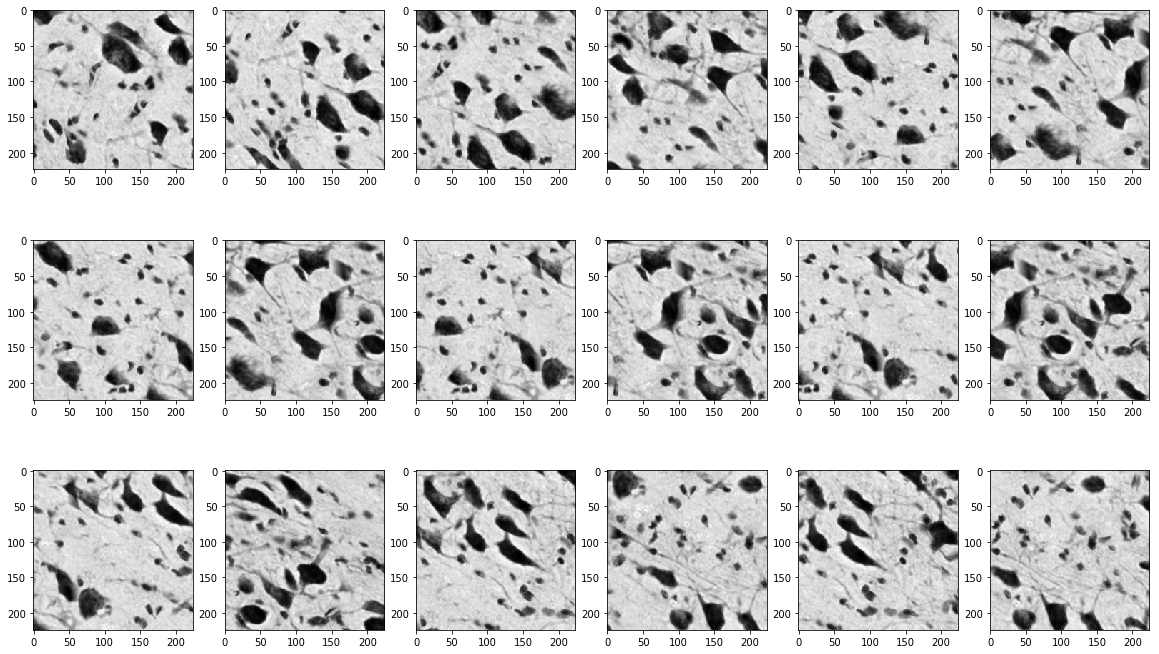

In [79]:
# Raw image filepaths should be retrieved using the Datajoint database, retrieving processed images for the associated stack
raw_img_fp = '/home/alexn/Downloads/MD585-IHC34-2015.07.16-16.38.23_MD585_2_0101_prep2_lossless.tif'


# Slice index has 1-1 correspondance with slice name. This should be retrieved from the Slice datajoint table.
#    '190' is associated with the raw_img_fp above
slice_index = '190'
structure = '12N'

# Load a raw, prep2 image
img = cv2.imread( raw_img_fp , 2)

# Initialize an empty list that wil be filled with the patches
patches = []

for patch_index in range(len(all_patch_locations[structure][slice_index])):
    x = int( all_patch_locations[structure][slice_index][patch_index][0] )
    y = int( all_patch_locations[structure][slice_index][patch_index][1] )
    
    patch = img[ y:y+PATCH_LENGTH, x:x+PATCH_LENGTH ]
    patches.append(patch)

# Plotting 18 figures
fig, ax = plt.subplots(3, 6, figsize=(20,12))
# Displays every 4th patch (up to 4*18=72nd patch), close patches overlap. 
for axis, patch in zip( ax.flatten(), patches[0:72:4]):
    axis.imshow( patch, cmap='gray' )

## MD585_prep2_gray_win1 Folder

This folder contains a list of text files, each text file is a list of all patch locations per section in the following format:
    - <Patch Index> <Patch X Coor> <Patch Y Coor>
    
The patch coordinates, on a particular section, are located inside of a structure if they are inside "`all_patch_locations[structure][section]`".